**FastText Classification**

The goal of text classification is to assign documents different categories. In our project categories are positive, negative and neutral. Nowadays, the dominant approach to build such classifiers is machine learning, that is learning classification rules from examples. In order to build such classifiers, we need labeled data, which we have obtained as an airline_sentiment dataset.

The first step is to install and build fastText.

In [ ]:
!wget https://github.com/facebookresearch/fastText/archive/0.2.0.zip
!unzip 0.2.0.zip

--2020-11-06 01:45:26--  https://github.com/facebookresearch/fastText/archive/0.2.0.zip
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/facebookresearch/fastText/zip/0.2.0 [following]
--2020-11-06 01:45:27--  https://codeload.github.com/facebookresearch/fastText/zip/0.2.0
Resolving codeload.github.com (codeload.github.com)... 52.68.31.213
Connecting to codeload.github.com (codeload.github.com)|52.68.31.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘0.2.0.zip’

0.2.0.zip               [  <=>               ]   4.10M  12.5MB/s    in 0.3s    

2020-11-06 01:45:28 (12.5 MB/s) - ‘0.2.0.zip’ saved [4304799]

Archive:  0.2.0.zip
7842495a4d64c7a3bb4339d45d6e64321d002ed8
   creating: fastText-0.2.0/
   creating: fastText-0.2.0/.circleci/
  inflating: fastText-0.2.0/.

In [ ]:
pip install fastText-0.2.0/

Processing ./fastText-0.2.0
  Created wheel for fasttext: filename=fasttext-0.8.22-cp36-cp36m-linux_x86_64.whl size=2325055 sha256=aa384f82abab614a4f5d3a37e872cc611034b32520bd648d824c8c3372d80954
  Stored in directory: /root/.cache/pip/wheels/11/5c/45/07e9483cff6a5fe6a59f48b47c7b1910978a79aed8606f8aa5
Successfully built fasttext


**Getting and preparing the data**

As mentioned in the introduction, we need labeled data to train our supervised classifier. Here since we are doing the sentiment analysis. we are replacing the original data of stack exchange questions with that of airline. The data has been prepared in another python file and made it readble by **fastText** . We will upload that file for training purpose.

In [ ]:
#text in this case is the main airline dataset.
from google.colab import files
upload = files.upload()

Saving text.txt to text.txt


**Our first classifier**

In [ ]:
import fastText
model = fastText.train_supervised(input="text.txt")

We can now use the model variable to access information on the trained model.

Now, we can test our classifier, by testing it on the data created on Crunchyroll and see what results we get.

In [ ]:
from google.colab import files
upload = files.upload()

Saving CRFinal.txt to CRFinal.txt


In [ ]:
 model.test("CRFinal.txt")

(198, 0.5909090909090909, 0.5909090909090909)

**Making the model better**

*more epochs and larger learning rate*

By default, fastText sees each training example only five times during training, we can increase the number of times each examples is seen (also known as the number of epochs), by using the -epoch option:

In [ ]:
model1 = fastText.train_supervised(input="text.txt", lr=1.0, epoch=25)
model1.test("CRFinal.txt")

(198, 0.5303030303030303, 0.5303030303030303)

We see that there is a slight decrease in the precision and recall value of the reaults. This means that just increasing the learning rate will note make the model better

**word n-grams : Bigrams**

A 'unigram' refers to a single undividing unit used as an input to a model. For instance a unigram can be a word or a letter depending in any model. In fastText, we work at the word level and thus unigrams are words.

Similarly we denote by '**bigram**' the concatenation of 2 consecutive words. So we will see if our accuracy improves by this or not.

In [ ]:
model2 = fastText.train_supervised(input="text.txt", lr=1.0, epoch=25, wordNgrams=2)
model2.test("CRFinal.txt")

(198, 0.6111111111111112, 0.6111111111111112)

We notice that the accuracy has increased which suggests that using bigrams will lead to an overall better outputs 

For the sake of comparison we take a small amount of small data from the airline data to check if the precision value improves but it was noticed that the new values are significantly worse.

In [ ]:
!tail -n 200 text.txt > airline.small

In [ ]:
model2 = fastText.train_supervised(input="airline.small", lr=1.0, epoch=25, wordNgrams=2)
model2.test("CRFinal.txt")

(198, 0.1111111111111111, 0.1111111111111111)

Now in order to see how the Model is working on the original dataset itself, The data is split into a large chunk and a small data comparable to our dataset

In [ ]:
!head -n 14440 text.txt > airline.train
!tail -n 200 text.txt > airline.valid

For first classifier

In [ ]:
model = fastText.train_supervised(input="airline.train")

In [ ]:
model.test("airline.valid")

(200, 0.845, 0.845)

Increasing learning rate and adding epochs

In [ ]:
model1 = fastText.train_supervised(input="airline.train", lr=1.0, epoch=25)

In [ ]:
model1.test("airline.valid")

(200, 0.81, 0.81)

Using Bigrams

In [ ]:
model2 = fastText.train_supervised(input="airline.train", lr=1.0, epoch=25, wordNgrams=2)

In [ ]:
model2.test("airline.valid")

(200, 0.835, 0.835)

**Comparing the twitter results with the original dataset**




In [ ]:
import pandas as pd
data = {'Model': ['First Classifier','Classifier with more epchos','Bigrams',],
        'Original Data': [0.845,0.81,0.835],
        'New Data':[0.59,0.53,0.611]
        }
df4 = pd.DataFrame(data, columns = ['Model', 'Original Data','New Data'])
df4

,Model,Original Data,New Data
0,First Classifier,0.845,0.590
1,Classifier with more epchos,0.810,0.530
2,Bigrams,0.835,0.611


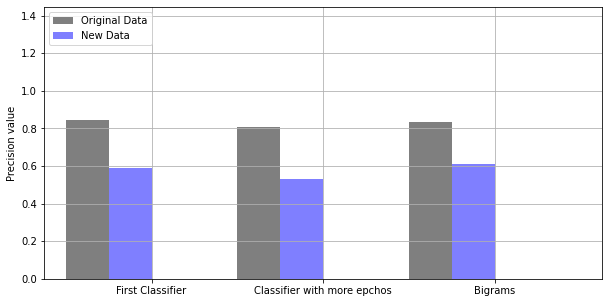

In [ ]:
import matplotlib.pyplot as plt
pos = list(range(len(df4['Original Data'])))
width = 0.25
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, df4['Original Data'], width, alpha=0.5, color='black')
plt.bar([p + width for p in pos], df4['New Data'], width, alpha=0.5, color='Blue')
ax.set_ylabel('Precision value')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df4['Model'])
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df4['Original Data'] + df4['New Data'])])
plt.legend(['Original Data', 'New Data'], loc='upper left')
plt.grid()
plt.show()